In [54]:
import numpy as np
import pandas as pd
from scipy.stats import reciprocal
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import fetch_california_housing

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV  # for large datasets, vs GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron  # just like LogisticRegression, but with a step change 0 to 1
from sklearn.linear_model import SGDClassifier

import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.5.0'

In [3]:
keras.__version__

'2.5.0'

In [4]:
iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, width
y = (iris.target == 0).astype(int)  # Iris setosa?

# use perceptron for binary classification (most basic ANN)
per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

Perceptron(random_state=42)

In [5]:
X_new = [[2, 0.5]]  # petal length, width in an array
per_clf.predict(X_new)

array([1])

In [6]:
sgd_clf = SGDClassifier(loss='perceptron',  # equivalent to the Perceptron class
                        learning_rate='constant', eta0=1,  # learning rate
                        penalty=None, random_state=42)  # no regularisation
sgd_clf.fit(X, y)
sgd_clf.predict(X_new)

array([1])

In [7]:
# load in the fashion mnist dataset: 28 x 28 arrays of 0-255 pixel elements
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [8]:
# further split training set into training and validation sets
X_valid, X_train = X_train[:5000] / 255.0, X_train[5000:] / 255.0  # scale the data for gradient descent in MLP
y_valid, y_train = y_train[:5000], y_train[5000:]  # multiclass labels

X_test = X_test / 255.0

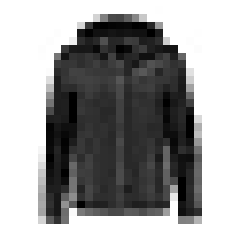

In [9]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off');  # Coat

In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]  # assign each y label a name
class_names[y_train[0]]

'Coat'

In [11]:
set(y_train)  # 10 classes

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [12]:
# build a basic classification MLP
model = keras.models.Sequential()  # initialise this API to add layers sequentially
model.add(keras.layers.Flatten(input_shape=[28, 28]))    # input requires 1D array
model.add(keras.layers.Dense(300, activation='relu'))    # 1st hidden layer: 300 neurons
model.add(keras.layers.Dense(100, activation='relu'))    # 2nd hidden layer: 100 neurons
model.add(keras.layers.Dense(10, activation='softmax'))  # 10 classes

In [13]:
# alternative build with a list:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]), 
    keras.layers.Dense(300, activation='relu'), 
    keras.layers.Dense(100, activation='relu'), 
    keras.layers.Dense(10, activation='softmax')])

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.layers  # a list (used sequential API)

In [16]:
hidden_1 = model.layers[1]  # first hidden layer i.e. second layer in model

# get the layer's initial (random) weight and bias coefficients
weights, biases = hidden_1.get_weights()
weights.shape, biases.shape  # 28 x 28 is 784

((784, 300), (300,))

In [17]:
# also need to specify the loss function to be used by the model for optimisation
model.compile(loss='sparse_categorical_crossentropy',  # y labels are multi categorical
              optimizer=keras.optimizers.SGD(learning_rate=0.01), # back propagation with autodiff & SGD
              metrics=['accuracy'])  

In [18]:
# now fit the MLP model
history = model.fit(X_train, y_train, epochs=30,  # iterations to convergence
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7291 - accuracy: 0.7606 - val_loss: 0.5155 - val_accuracy: 0.8248
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4898 - accuracy: 0.8295 - val_loss: 0.4363 - val_accuracy: 0.8566
Epoch 3/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.4446 - accuracy: 0.8435 - val_loss: 0.4250 - val_accuracy: 0.8530
Epoch 4/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.4177 - accuracy: 0.8530 - val_loss: 0.3933 - val_accuracy: 0.8666
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3963 - accuracy: 0.8611 - val_loss: 0.3971 - val_accuracy: 0.8636
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3805 - accuracy: 0.8648 - val_loss: 0.3809 - val_accuracy: 0.8664
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3669 - accuracy: 0.8701 - val_loss: 0.3800 - val_accuracy:

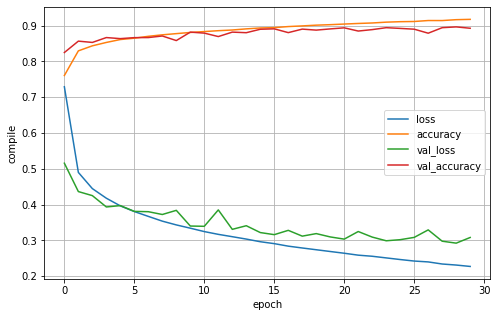

In [19]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.xlabel('epoch')
plt.ylabel('compile')
plt.grid(True);

In [20]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 727us/step - loss: 0.3399 - accuracy: 0.8824


[0.3398832678794861, 0.8823999762535095]

In [21]:
X_new = X_test[:3]
y_proba = model.predict(X_new)  # predict() gives 10 softmax results
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [22]:
y_pred = np.argmax(y_proba, axis=1)
y_pred

array([9, 2, 1])

In [23]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [24]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

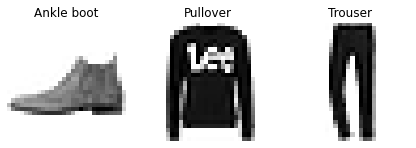

In [26]:
plt.figure(figsize=(7.2, 2.4))
for i, image in enumerate(X_new):
    plt.subplot(1, 3, i + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[i]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5);

In [27]:
# use MLP for regression
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

In [28]:
X_train.shape

(11610, 8)

In [29]:
X_train.shape[1:]  # 8 features

(8,)

In [30]:
# regression MLP
reg_model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),  # flatten the features
    keras.layers.Dense(1)])  # regression MLP has one output neuron only and no activation func

reg_model.compile(loss='mean_squared_error',  # loss func for regression
                  optimizer=keras.optimizers.SGD(learning_rate=1e-3))  

reg_model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 0s 823us/step - loss: 2.5524 - val_loss: 1.0044
Epoch 2/20
363/363 [==============================] - 0s 707us/step - loss: 0.8842 - val_loss: 0.7846
Epoch 3/20
363/363 [==============================] - 0s 617us/step - loss: 0.7711 - val_loss: 0.7318
Epoch 4/20
363/363 [==============================] - 0s 621us/step - loss: 0.7292 - val_loss: 0.6958
Epoch 5/20
363/363 [==============================] - 0s 665us/step - loss: 0.6988 - val_loss: 0.6646
Epoch 6/20
363/363 [==============================] - 0s 579us/step - loss: 0.6731 - val_loss: 0.6364
Epoch 7/20
363/363 [==============================] - 0s 532us/step - loss: 0.6502 - val_loss: 0.6115
Epoch 8/20
363/363 [==============================] - 0s 556us/step - loss: 0.6294 - val_loss: 0.5893
Epoch 9/20
363/363 [==============================] - 0s 646us/step - loss: 0.6111 - val_loss: 0.5705
Epoch 10/20
363/363 [==============================] - 0s 596us/step - loss: 0.594

In [31]:
mse_test = reg_model.evaluate(X_test, y_test)
mse_test

162/162 [==============================] - 0s 560us/step - loss: 0.4958


0.495828777551651

In [32]:
X_new = X_test[:3]
y_pred = reg_model.predict(X_new)  # 1 output value per instance
y_pred

array([[1.3198768],
       [3.3524315],
       [2.8856468]], dtype=float32)

In [33]:
y_test[:3]

array([1.259  , 5.00001, 4.456  ])

In [52]:
# use a functional API (one layer is a function of another layer, i.e. non-sequential)
input_ = keras.layers.Input(shape=X_train.shape[1:])  # a tensor, not a layer (not InputLayer())
hidden_1 = keras.layers.Dense(30, activation='relu')(input_)    # built on the input_ tensor
hidden_2 = keras.layers.Dense(30, activation='relu')(hidden_1)  # built on output of hidden_1
concat_ = keras.layers.Concatenate()([input_, hidden_2])  # take both input_ and hidden_2 as input for output layer
output_ = keras.layers.Dense(1)(concat_)  # built on combined input options

# simple regression - directly use input_
# deep regression - use hidden_2 as if sequential MLP
reg_model = keras.models.Model(inputs=[input_], outputs=[output_])

In [35]:
# split input features to subsets with functional API
input_A = keras.layers.Input(shape=[5], name='wide_input')  # use 5 features for simple regression
input_B = keras.layers.Input(shape=[6], name='deep_input')  # use 6 features for deep regression
hidden_1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden_2 = keras.layers.Dense(30, activation='relu')(hidden_1)
concat_ = keras.layers.concatenate([input_A, hidden_2])
output_ = keras.layers.Dense(1, name='output')(concat_)

# two sets of input
reg_model = keras.models.Model(inputs=[input_A, input_B], outputs=[output_])

In [36]:
reg_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep_input (InputLayer)         [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_11 (Dense)                (None, 30)           210         deep_input[0][0]                 
__________________________________________________________________________________________________
wide_input (InputLayer)         [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_12 (Dense)                (None, 30)           930         dense_11[0][0]                   
____________________________________________________________________________________________

In [37]:
# prepare data for input_A (5 features - 0 to 4) and input_B (6 features - 2 to 7)
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]

reg_model.compile(loss='mse', optimizer=keras.optimizers.SGD(learning_rate=1e-3))

# two X inputs in a tuple
reg_model.fit((X_train_A, X_train_B), y_train, epochs=20, 
              validation_data=((X_valid_A, X_valid_B), y_valid))

Epoch 1/20
363/363 [==============================] - 1s 832us/step - loss: 2.0310 - val_loss: 0.8750
Epoch 2/20
363/363 [==============================] - 0s 732us/step - loss: 0.8316 - val_loss: 0.7220
Epoch 3/20
363/363 [==============================] - 0s 641us/step - loss: 0.7205 - val_loss: 0.6633
Epoch 4/20
363/363 [==============================] - 0s 681us/step - loss: 0.6675 - val_loss: 0.6181
Epoch 5/20
363/363 [==============================] - 0s 663us/step - loss: 0.6296 - val_loss: 0.5797
Epoch 6/20
363/363 [==============================] - 0s 674us/step - loss: 0.6000 - val_loss: 0.5481
Epoch 7/20
363/363 [==============================] - 0s 704us/step - loss: 0.5767 - val_loss: 0.5193
Epoch 8/20
363/363 [==============================] - 0s 645us/step - loss: 0.5581 - val_loss: 0.4983
Epoch 9/20
363/363 [==============================] - 0s 711us/step - loss: 0.5425 - val_loss: 0.4819
Epoch 10/20
363/363 [==============================] - 0s 641us/step - loss: 0.532

In [38]:
mse_test = reg_model.evaluate((X_test_A, X_test_B), y_test)
mse_test

162/162 [==============================] - 0s 562us/step - loss: 0.4858


0.48577621579170227

In [39]:
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]
y_pred = reg_model.predict((X_new_A, X_new_B))  # two inputs
y_pred

array([[1.0954134],
       [3.1826234],
       [2.8172345]], dtype=float32)

In [40]:
y_test[:3]

array([1.259  , 5.00001, 4.456  ])

In [41]:
# can also add extra outputs with the functional API:
input_A = keras.layers.Input(shape=[5], name='wide_input')  
input_B = keras.layers.Input(shape=[6], name='deep_input')  
hidden_1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden_2 = keras.layers.Dense(30, activation='relu')(hidden_1)
concat_ = keras.layers.concatenate([input_A, hidden_2])
output_main = keras.layers.Dense(1, name='main_output')(concat_)   # output from both inputs and hidden_2
output_auxl = keras.layers.Dense(1, name='auxl_output')(hidden_2)  # auxiliary output from hidden_2 only

reg_model = keras.models.Model(inputs=[input_A, input_B], 
                               outputs=[output_main, output_auxl])

In [42]:
# each output has its own loss func (back-propagation)
reg_model.compile(loss=['mse', 'mse'], 
                  loss_weights=[0.9, 0.1],  # lower weighting to auxl output as it's the regularisation term
                  optimizer=keras.optimizers.SGD(learning_rate=1e-3))

# likewise, each output has its own target label
reg_model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=20, 
              validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 2.8810 - main_output_loss: 2.6516 - auxl_output_loss: 4.9457 - val_loss: 1.5784 - val_main_output_loss: 1.3209 - val_auxl_output_loss: 3.8961
Epoch 2/20
363/363 [==============================] - 0s 769us/step - loss: 1.2272 - main_output_loss: 0.9921 - auxl_output_loss: 3.3422 - val_loss: 0.9253 - val_main_output_loss: 0.7330 - val_auxl_output_loss: 2.6562
Epoch 3/20
363/363 [==============================] - 0s 762us/step - loss: 0.8609 - main_output_loss: 0.6934 - auxl_output_loss: 2.3685 - val_loss: 0.7428 - val_main_output_loss: 0.6111 - val_auxl_output_loss: 1.9288
Epoch 4/20
363/363 [==============================] - 0s 777us/step - loss: 0.7487 - main_output_loss: 0.6284 - auxl_output_loss: 1.8309 - val_loss: 0.6742 - val_main_output_loss: 0.5759 - val_auxl_output_loss: 1.5591
Epoch 5/20
363/363 [==============================] - 0s 762us/step - loss: 0.6938 - main_output_loss: 0.5989 - auxl_output_loss: 

In [43]:
# total loss and the constituent loss values
total_loss, main_loss, auxl_loss = reg_model.evaluate((X_test_A, X_test_B), (y_test, y_test))
total_loss, main_loss, auxl_loss

162/162 [==============================] - 0s 648us/step - loss: 0.5419 - main_output_loss: 0.4949 - auxl_output_loss: 0.9649


(0.5418647527694702, 0.4948587119579315, 0.9649204015731812)

In [44]:
y_pred_main, y_pred_auxl = reg_model.predict((X_new_A, X_new_B))
y_pred_main, y_pred_auxl  # y_pred_main is now regularised by the auxl term

(array([[1.2064285],
        [3.3758924],
        [2.9467442]], dtype=float32),
 array([[1.8049921],
        [2.3831098],
        [2.2809515]], dtype=float32))

In [45]:
y_test[:3]

array([1.259  , 5.00001, 4.456  ])

In [46]:
# Subclassing API - create classes (OOP) for repetitive use
# below does the same as the reg_model above
class FunctionalRegModel(keras.Model):  # sub keras's Model class
    def __init__(self, units=30, activation='relu', **kwargs):
        super().__init__(**kwargs)  # inherit keras.Model's standard args
        self.hidden_1 = keras.layers.Dense(units, activation=activation)
        self.hidden_2 = keras.layers.Dense(units, activation=activation)
        self.output_main = keras.layers.Dense(1)
        self.output_auxl = keras.layers.Dense(1)
        
    def call(self, inputs):  # used by Model.fit
        input_A, input_B = inputs
        hidden_1 = self.hidden_1(input_B)
        hidden_2 = self.hidden_2(hidden_1)
        concat = keras.layers.concatenate([input_A, hidden_2])
        output_main = self.output_main(concat)
        output_auxl = self.output_auxl(hidden_2)
        return output_main, output_auxl
    
# now create an object using this (sub)class
reg_model = FunctionalRegModel()

In [47]:
reg_model.compile(loss=['mse', 'mse'], loss_weights=[0.9, 0.1], 
                  optimizer=keras.optimizers.SGD(learning_rate=1e-3))
reg_model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=20,
               validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 2.8075 - output_1_loss: 2.6004 - output_2_loss: 4.6717 - val_loss: 1.3940 - val_output_1_loss: 1.1814 - val_output_2_loss: 3.3076
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 1.1654 - output_1_loss: 0.9903 - output_2_loss: 2.7416 - val_loss: 0.8993 - val_output_1_loss: 0.7679 - val_output_2_loss: 2.0816
Epoch 3/20
363/363 [==============================] - 0s 940us/step - loss: 0.8790 - output_1_loss: 0.7641 - output_2_loss: 1.9128 - val_loss: 0.7432 - val_output_1_loss: 0.6513 - val_output_2_loss: 1.5706
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7757 - output_1_loss: 0.6878 - output_2_loss: 1.5667 - val_loss: 0.6795 - val_output_1_loss: 0.6025 - val_output_2_loss: 1.3730
Epoch 5/20
363/363 [==============================] - 0s 761us/step - loss: 0.7284 - output_1_loss: 0.6513 - output_2_loss: 1.4224 - val_loss: 0.6435 - val_output_1_loss: 0.5716 - va

In [73]:
# fine-tuning MLP hyperparameters with grid search

# build an MLP model as a function of to-be-tuned hyperparameters
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    # define model with Sequential API
    model = keras.models.Sequential()
    # add input layer
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    # add hidden layers
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation='relu'))
    # add output layer - single neuron regression
    model.add(keras.layers.Dense(1))
    # compile back-propagation
    model.compile(loss='mse', optimizer=keras.optimizers.SGD(learning_rate=learning_rate))
    return model

# next, wrap the keras model with sklearn so we can use grid search methods
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)  # regression MLP wrapper

# train the model as if it's a sklearn object
keras_reg.fit(X_train, y_train, epochs=100)
mse_test = keras_reg.score(X_test, y_test)

# run grid search to find the best hyperparameters
param_search = {'n_hidden': [0, 1, 2, 3], 
                'n_neurons': np.arange(0, 100), 
                'learning_rate': reciprocal(3e-4, 3e-2)}  # matching build_model hyperparameters
rnd_search_cv = RandomizedSearchCV(keras_reg,  # use keras_reg as if sklearn regressor
                                   param_search, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100)

Epoch 1/100
363/363 [==============================] - 0s 479us/step - loss: 1.4733
Epoch 2/100
363/363 [==============================] - 0s 447us/step - loss: 0.7152
Epoch 3/100
363/363 [==============================] - 0s 518us/step - loss: 0.6522
Epoch 4/100
363/363 [==============================] - 0s 487us/step - loss: 1.1177
Epoch 5/100
363/363 [==============================] - 0s 490us/step - loss: 0.6358
Epoch 6/100
363/363 [==============================] - 0s 540us/step - loss: 0.5160
Epoch 7/100
363/363 [==============================] - 0s 474us/step - loss: 0.4978
Epoch 8/100
363/363 [==============================] - 0s 474us/step - loss: 0.4849
Epoch 9/100
363/363 [==============================] - 0s 469us/step - loss: 0.4751
Epoch 10/100
363/363 [==============================] - 0s 500us/step - loss: 0.4681
Epoch 11/100
363/363 [==============================] - 0s 560us/step - loss: 0.4601
Epoch 12/100
363/363 [==============================] - 0s 503us/step - lo

363/363 [==============================] - 0s 468us/step - loss: 0.3528
Epoch 98/100
363/363 [==============================] - 0s 413us/step - loss: 0.3526
Epoch 99/100
363/363 [==============================] - 0s 403us/step - loss: 0.3564
Epoch 100/100
162/162 [==============================] - 0s 375us/step - loss: 0.4061
Epoch 1/100
242/242 [==============================] - 0s 424us/step - loss: 5.6365
Epoch 2/100
242/242 [==============================] - 0s 425us/step - loss: 5.6365
Epoch 3/100
242/242 [==============================] - 0s 431us/step - loss: 5.6365
Epoch 4/100
242/242 [==============================] - 0s 394us/step - loss: 5.6365
Epoch 5/100
242/242 [==============================] - 0s 394us/step - loss: 5.6365
Epoch 6/100
242/242 [==============================] - 0s 415us/step - loss: 5.6365
Epoch 7/100
242/242 [==============================] - 0s 410us/step - loss: 5.6365
Epoch 8/100
242/242 [==============================] - 0s 397us/step - loss: 5.6365


242/242 [==============================] - 0s 483us/step - loss: 5.6365
Epoch 93/100
242/242 [==============================] - 0s 698us/step - loss: 5.6365
Epoch 94/100
242/242 [==============================] - 0s 438us/step - loss: 5.6365
Epoch 95/100
242/242 [==============================] - 0s 460us/step - loss: 5.6365
Epoch 96/100
242/242 [==============================] - 0s 421us/step - loss: 5.6365
Epoch 97/100
242/242 [==============================] - 0s 396us/step - loss: 5.6365
Epoch 98/100
242/242 [==============================] - 0s 446us/step - loss: 5.6365
Epoch 99/100
242/242 [==============================] - 0s 453us/step - loss: 5.6365
Epoch 100/100
121/121 [==============================] - 0s 529us/step - loss: 5.7385
Epoch 1/100
242/242 [==============================] - 0s 560us/step - loss: 5.7492
Epoch 2/100
242/242 [==============================] - 0s 549us/step - loss: 5.7492
Epoch 3/100
242/242 [==============================] - 0s 476us/step - loss: 5.

242/242 [==============================] - 0s 396us/step - loss: 5.7492
Epoch 88/100
242/242 [==============================] - 0s 391us/step - loss: 5.7492
Epoch 89/100
242/242 [==============================] - 0s 401us/step - loss: 5.7492
Epoch 90/100
242/242 [==============================] - 0s 392us/step - loss: 5.7492
Epoch 91/100
242/242 [==============================] - 0s 393us/step - loss: 5.7492
Epoch 92/100
242/242 [==============================] - 0s 398us/step - loss: 5.7492
Epoch 93/100
242/242 [==============================] - 0s 392us/step - loss: 5.7492
Epoch 94/100
242/242 [==============================] - 0s 395us/step - loss: 5.7492
Epoch 95/100
242/242 [==============================] - 0s 394us/step - loss: 5.7492
Epoch 96/100
242/242 [==============================] - 0s 388us/step - loss: 5.7492
Epoch 97/100
242/242 [==============================] - 0s 392us/step - loss: 5.7492
Epoch 98/100
242/242 [==============================] - 0s 437us/step - loss: 

242/242 [==============================] - 0s 766us/step - loss: 5.6258
Epoch 83/100
242/242 [==============================] - 0s 576us/step - loss: 5.6258
Epoch 84/100
242/242 [==============================] - 0s 473us/step - loss: 5.6258
Epoch 85/100
242/242 [==============================] - 0s 432us/step - loss: 5.6258
Epoch 86/100
242/242 [==============================] - 0s 410us/step - loss: 5.6258
Epoch 87/100
242/242 [==============================] - 0s 397us/step - loss: 5.6258
Epoch 88/100
242/242 [==============================] - 0s 408us/step - loss: 5.6258
Epoch 89/100
242/242 [==============================] - 0s 389us/step - loss: 5.6258
Epoch 90/100
242/242 [==============================] - 0s 390us/step - loss: 5.6258
Epoch 91/100
242/242 [==============================] - 0s 397us/step - loss: 5.6258
Epoch 92/100
242/242 [==============================] - 0s 394us/step - loss: 5.6258
Epoch 93/100
242/242 [==============================] - 0s 399us/step - loss: 

242/242 [==============================] - 0s 487us/step - loss: 0.4012
Epoch 78/100
242/242 [==============================] - 0s 485us/step - loss: 0.3999
Epoch 79/100
242/242 [==============================] - 0s 486us/step - loss: 0.3988
Epoch 80/100
242/242 [==============================] - 0s 482us/step - loss: 0.3979
Epoch 81/100
242/242 [==============================] - 0s 476us/step - loss: 0.3970
Epoch 82/100
242/242 [==============================] - 0s 486us/step - loss: 0.3961
Epoch 83/100
242/242 [==============================] - 0s 484us/step - loss: 0.3950
Epoch 84/100
242/242 [==============================] - 0s 483us/step - loss: 0.3939
Epoch 85/100
242/242 [==============================] - 0s 483us/step - loss: 0.3932
Epoch 86/100
242/242 [==============================] - 0s 484us/step - loss: 0.3920
Epoch 87/100
242/242 [==============================] - 0s 492us/step - loss: 0.3911
Epoch 88/100
242/242 [==============================] - 0s 479us/step - loss: 

242/242 [==============================] - 0s 492us/step - loss: 0.3958
Epoch 73/100
242/242 [==============================] - 0s 492us/step - loss: 0.3943
Epoch 74/100
242/242 [==============================] - 0s 485us/step - loss: 0.3929
Epoch 75/100
242/242 [==============================] - 0s 478us/step - loss: 0.3921
Epoch 76/100
242/242 [==============================] - 0s 477us/step - loss: 0.3907
Epoch 77/100
242/242 [==============================] - 0s 490us/step - loss: 0.3898
Epoch 78/100
242/242 [==============================] - 0s 491us/step - loss: 0.3887
Epoch 79/100
242/242 [==============================] - 0s 479us/step - loss: 0.3875
Epoch 80/100
242/242 [==============================] - 0s 483us/step - loss: 0.3868
Epoch 81/100
242/242 [==============================] - 0s 478us/step - loss: 0.3858
Epoch 82/100
242/242 [==============================] - 0s 484us/step - loss: 0.3849
Epoch 83/100
242/242 [==============================] - 0s 478us/step - loss: 

242/242 [==============================] - 0s 490us/step - loss: 0.3851
Epoch 68/100
242/242 [==============================] - 0s 481us/step - loss: 0.3838
Epoch 69/100
242/242 [==============================] - 0s 482us/step - loss: 0.3827
Epoch 70/100
242/242 [==============================] - 0s 485us/step - loss: 0.3816
Epoch 71/100
242/242 [==============================] - 0s 479us/step - loss: 0.3803
Epoch 72/100
242/242 [==============================] - 0s 481us/step - loss: 0.3796
Epoch 73/100
242/242 [==============================] - 0s 480us/step - loss: 0.3785
Epoch 74/100
242/242 [==============================] - 0s 494us/step - loss: 0.3776
Epoch 75/100
242/242 [==============================] - 0s 495us/step - loss: 0.3766
Epoch 76/100
242/242 [==============================] - 0s 478us/step - loss: 0.3754
Epoch 77/100
242/242 [==============================] - 0s 484us/step - loss: 0.3743
Epoch 78/100
242/242 [==============================] - 0s 482us/step - loss: 

242/242 [==============================] - 0s 377us/step - loss: nan
Epoch 63/100
242/242 [==============================] - 0s 367us/step - loss: nan
Epoch 64/100
242/242 [==============================] - 0s 366us/step - loss: nan
Epoch 65/100
242/242 [==============================] - 0s 370us/step - loss: nan
Epoch 66/100
242/242 [==============================] - 0s 370us/step - loss: nan
Epoch 67/100
242/242 [==============================] - 0s 376us/step - loss: nan
Epoch 68/100
242/242 [==============================] - 0s 368us/step - loss: nan
Epoch 69/100
242/242 [==============================] - 0s 370us/step - loss: nan
Epoch 70/100
242/242 [==============================] - 0s 380us/step - loss: nan
Epoch 71/100
242/242 [==============================] - 0s 369us/step - loss: nan
Epoch 72/100
242/242 [==============================] - 0s 369us/step - loss: nan
Epoch 73/100
242/242 [==============================] - 0s 373us/step - loss: nan
Epoch 74/100
242/242 [=======

242/242 [==============================] - 0s 378us/step - loss: 0.7073
Epoch 60/100
242/242 [==============================] - 0s 372us/step - loss: 0.5859
Epoch 61/100
242/242 [==============================] - 0s 378us/step - loss: 0.7081
Epoch 62/100
242/242 [==============================] - 0s 371us/step - loss: 0.6330
Epoch 63/100
242/242 [==============================] - 0s 379us/step - loss: 0.9016
Epoch 64/100
242/242 [==============================] - 0s 376us/step - loss: 0.5541
Epoch 65/100
242/242 [==============================] - 0s 371us/step - loss: 0.5702
Epoch 66/100
242/242 [==============================] - 0s 368us/step - loss: 0.5528
Epoch 67/100
242/242 [==============================] - 0s 375us/step - loss: 0.7850
Epoch 68/100
242/242 [==============================] - 0s 379us/step - loss: 0.5796
Epoch 69/100
242/242 [==============================] - 0s 373us/step - loss: 0.5824
Epoch 70/100
242/242 [==============================] - 0s 372us/step - loss: 

242/242 [==============================] - 0s 371us/step - loss: nan
Epoch 55/100
242/242 [==============================] - 0s 389us/step - loss: nan
Epoch 56/100
242/242 [==============================] - 0s 372us/step - loss: nan
Epoch 57/100
242/242 [==============================] - 0s 379us/step - loss: nan
Epoch 58/100
242/242 [==============================] - 0s 386us/step - loss: nan
Epoch 59/100
242/242 [==============================] - 0s 378us/step - loss: nan
Epoch 60/100
242/242 [==============================] - 0s 376us/step - loss: nan
Epoch 61/100
242/242 [==============================] - 0s 370us/step - loss: nan
Epoch 62/100
242/242 [==============================] - 0s 376us/step - loss: nan
Epoch 63/100
242/242 [==============================] - 0s 374us/step - loss: nan
Epoch 64/100
242/242 [==============================] - 0s 374us/step - loss: nan
Epoch 65/100
242/242 [==============================] - 0s 373us/step - loss: nan
Epoch 66/100
242/242 [=======

242/242 [==============================] - 0s 404us/step - loss: 0.3751
Epoch 52/100
242/242 [==============================] - 0s 399us/step - loss: 0.3730
Epoch 53/100
242/242 [==============================] - 0s 398us/step - loss: 0.3731
Epoch 54/100
242/242 [==============================] - 0s 397us/step - loss: 0.3721
Epoch 55/100
242/242 [==============================] - 0s 404us/step - loss: 0.3718
Epoch 56/100
242/242 [==============================] - 0s 399us/step - loss: 0.3698
Epoch 57/100
242/242 [==============================] - 0s 398us/step - loss: 0.3706
Epoch 58/100
242/242 [==============================] - 0s 399us/step - loss: 0.3699
Epoch 59/100
242/242 [==============================] - 0s 406us/step - loss: 0.3683
Epoch 60/100
242/242 [==============================] - 0s 414us/step - loss: 0.3682
Epoch 61/100
242/242 [==============================] - 0s 403us/step - loss: 0.3691
Epoch 62/100
242/242 [==============================] - 0s 405us/step - loss: 

242/242 [==============================] - 0s 409us/step - loss: 0.3727
Epoch 47/100
242/242 [==============================] - 0s 412us/step - loss: 0.3739
Epoch 48/100
242/242 [==============================] - 0s 404us/step - loss: 0.3716
Epoch 49/100
242/242 [==============================] - 0s 405us/step - loss: 0.3716
Epoch 50/100
242/242 [==============================] - 0s 399us/step - loss: 0.3701
Epoch 51/100
242/242 [==============================] - 0s 404us/step - loss: 0.3729
Epoch 52/100
242/242 [==============================] - 0s 402us/step - loss: 0.3744
Epoch 53/100
242/242 [==============================] - 0s 406us/step - loss: 0.3710
Epoch 54/100
242/242 [==============================] - 0s 405us/step - loss: 0.3746
Epoch 55/100
242/242 [==============================] - 0s 402us/step - loss: 0.3690
Epoch 56/100
242/242 [==============================] - 0s 404us/step - loss: 0.3694
Epoch 57/100
242/242 [==============================] - 0s 412us/step - loss: 

242/242 [==============================] - 0s 405us/step - loss: 0.3764
Epoch 42/100
242/242 [==============================] - 0s 411us/step - loss: 0.3811
Epoch 43/100
242/242 [==============================] - 0s 410us/step - loss: 0.3735
Epoch 44/100
242/242 [==============================] - 0s 399us/step - loss: 0.3727
Epoch 45/100
242/242 [==============================] - 0s 403us/step - loss: 0.3779
Epoch 46/100
242/242 [==============================] - 0s 397us/step - loss: 0.3721
Epoch 47/100
242/242 [==============================] - 0s 400us/step - loss: 0.3705
Epoch 48/100
242/242 [==============================] - 0s 399us/step - loss: 0.3691
Epoch 49/100
242/242 [==============================] - 0s 407us/step - loss: 0.3754
Epoch 50/100
242/242 [==============================] - 0s 403us/step - loss: 0.3727
Epoch 51/100
242/242 [==============================] - 0s 400us/step - loss: 0.3692
Epoch 52/100
242/242 [==============================] - 0s 401us/step - loss: 

242/242 [==============================] - 0s 499us/step - loss: 0.3466
Epoch 37/100
242/242 [==============================] - 0s 487us/step - loss: 0.3444
Epoch 38/100
242/242 [==============================] - 0s 481us/step - loss: 0.3424
Epoch 39/100
242/242 [==============================] - 0s 484us/step - loss: 0.3397
Epoch 40/100
242/242 [==============================] - 0s 482us/step - loss: 0.3369
Epoch 41/100
242/242 [==============================] - 0s 482us/step - loss: 0.3362
Epoch 42/100
242/242 [==============================] - 0s 477us/step - loss: 0.3359
Epoch 43/100
242/242 [==============================] - 0s 492us/step - loss: 0.3332
Epoch 44/100
242/242 [==============================] - 0s 490us/step - loss: 0.3324
Epoch 45/100
242/242 [==============================] - 0s 478us/step - loss: 0.3295
Epoch 46/100
242/242 [==============================] - 0s 485us/step - loss: 0.3292
Epoch 47/100
242/242 [==============================] - 0s 474us/step - loss: 

242/242 [==============================] - 0s 488us/step - loss: 0.3435
Epoch 32/100
242/242 [==============================] - 0s 481us/step - loss: 0.3454
Epoch 33/100
242/242 [==============================] - 0s 482us/step - loss: 0.3409
Epoch 34/100
242/242 [==============================] - 0s 480us/step - loss: 0.3390
Epoch 35/100
242/242 [==============================] - 0s 482us/step - loss: 0.3375
Epoch 36/100
242/242 [==============================] - 0s 478us/step - loss: 0.3364
Epoch 37/100
242/242 [==============================] - 0s 488us/step - loss: 0.3340
Epoch 38/100
242/242 [==============================] - 0s 481us/step - loss: 0.3321
Epoch 39/100
242/242 [==============================] - 0s 479us/step - loss: 0.3322
Epoch 40/100
242/242 [==============================] - 0s 478us/step - loss: 0.3301
Epoch 41/100
242/242 [==============================] - 0s 481us/step - loss: 0.3279
Epoch 42/100
242/242 [==============================] - 0s 491us/step - loss: 

242/242 [==============================] - 0s 485us/step - loss: 0.3571
Epoch 27/100
242/242 [==============================] - 0s 517us/step - loss: 0.3541
Epoch 28/100
242/242 [==============================] - 0s 548us/step - loss: 0.3530
Epoch 29/100
242/242 [==============================] - 0s 572us/step - loss: 0.3538
Epoch 30/100
242/242 [==============================] - 0s 524us/step - loss: 0.3557
Epoch 31/100
242/242 [==============================] - 0s 512us/step - loss: 0.3502
Epoch 32/100
242/242 [==============================] - 0s 544us/step - loss: 0.3478
Epoch 33/100
242/242 [==============================] - 0s 519us/step - loss: 0.3455
Epoch 34/100
242/242 [==============================] - 0s 532us/step - loss: 0.3443
Epoch 35/100
242/242 [==============================] - 0s 519us/step - loss: 0.3453
Epoch 36/100
242/242 [==============================] - 0s 543us/step - loss: 0.3418
Epoch 37/100
242/242 [==============================] - 0s 511us/step - loss: 

242/242 [==============================] - 0s 468us/step - loss: 0.3625
Epoch 22/100
242/242 [==============================] - 0s 459us/step - loss: 0.3622
Epoch 23/100
242/242 [==============================] - 0s 475us/step - loss: 0.3583
Epoch 24/100
242/242 [==============================] - 0s 466us/step - loss: 0.3623
Epoch 25/100
242/242 [==============================] - 0s 458us/step - loss: 0.3540
Epoch 26/100
242/242 [==============================] - 0s 457us/step - loss: 0.3517
Epoch 27/100
242/242 [==============================] - 0s 461us/step - loss: 0.3500
Epoch 28/100
242/242 [==============================] - 0s 467us/step - loss: 0.3469
Epoch 29/100
242/242 [==============================] - 0s 458us/step - loss: 0.3452
Epoch 30/100
242/242 [==============================] - 0s 465us/step - loss: 0.3455
Epoch 31/100
242/242 [==============================] - 0s 458us/step - loss: 0.3432
Epoch 32/100
242/242 [==============================] - 0s 457us/step - loss: 

242/242 [==============================] - 0s 467us/step - loss: 0.3857
Epoch 17/100
242/242 [==============================] - 0s 467us/step - loss: 0.3807
Epoch 18/100
242/242 [==============================] - 0s 456us/step - loss: 0.3818
Epoch 19/100
242/242 [==============================] - 0s 462us/step - loss: 0.3867
Epoch 20/100
242/242 [==============================] - 0s 459us/step - loss: 0.3815
Epoch 21/100
242/242 [==============================] - 0s 450us/step - loss: 0.3772
Epoch 22/100
242/242 [==============================] - 0s 458us/step - loss: 0.3725
Epoch 23/100
242/242 [==============================] - 0s 466us/step - loss: 0.3708
Epoch 24/100
242/242 [==============================] - 0s 460us/step - loss: 0.3662
Epoch 25/100
242/242 [==============================] - 0s 458us/step - loss: 0.3640
Epoch 26/100
242/242 [==============================] - 0s 462us/step - loss: 0.3612
Epoch 27/100
242/242 [==============================] - 0s 465us/step - loss: 

242/242 [==============================] - 0s 461us/step - loss: 0.3996
Epoch 12/100
242/242 [==============================] - 0s 467us/step - loss: 0.3942
Epoch 13/100
242/242 [==============================] - 0s 454us/step - loss: 0.3887
Epoch 14/100
242/242 [==============================] - 0s 456us/step - loss: 0.3856
Epoch 15/100
242/242 [==============================] - 0s 462us/step - loss: 0.3866
Epoch 16/100
242/242 [==============================] - 0s 461us/step - loss: 0.3845
Epoch 17/100
242/242 [==============================] - 0s 457us/step - loss: 0.3807
Epoch 18/100
242/242 [==============================] - 0s 453us/step - loss: 0.3831
Epoch 19/100
242/242 [==============================] - 0s 474us/step - loss: 0.3787
Epoch 20/100
242/242 [==============================] - 0s 466us/step - loss: 0.3774
Epoch 21/100
242/242 [==============================] - 0s 458us/step - loss: 0.3788
Epoch 22/100
242/242 [==============================] - 0s 463us/step - loss: 

242/242 [==============================] - 0s 481us/step - loss: 0.7403
Epoch 7/100
242/242 [==============================] - 0s 471us/step - loss: 0.7043
Epoch 8/100
242/242 [==============================] - 0s 464us/step - loss: 0.6800
Epoch 9/100
242/242 [==============================] - 0s 486us/step - loss: 0.6615
Epoch 10/100
242/242 [==============================] - 0s 463us/step - loss: 0.6463
Epoch 11/100
242/242 [==============================] - 0s 463us/step - loss: 0.6331
Epoch 12/100
242/242 [==============================] - 0s 463us/step - loss: 0.6212
Epoch 13/100
242/242 [==============================] - 0s 472us/step - loss: 0.6105
Epoch 14/100
242/242 [==============================] - 0s 462us/step - loss: 0.6006
Epoch 15/100
242/242 [==============================] - 0s 463us/step - loss: 0.5913
Epoch 16/100
242/242 [==============================] - 0s 466us/step - loss: 0.5828
Epoch 17/100
242/242 [==============================] - 0s 458us/step - loss: 0.5

242/242 [==============================] - 0s 493us/step - loss: 3.3264
Epoch 2/100
242/242 [==============================] - 0s 467us/step - loss: 1.2437
Epoch 3/100
242/242 [==============================] - 0s 462us/step - loss: 0.8795
Epoch 4/100
242/242 [==============================] - 0s 465us/step - loss: 0.7535
Epoch 5/100
242/242 [==============================] - 0s 466us/step - loss: 0.7016
Epoch 6/100
242/242 [==============================] - 0s 461us/step - loss: 0.6744
Epoch 7/100
242/242 [==============================] - 0s 466us/step - loss: 0.6559
Epoch 8/100
242/242 [==============================] - 0s 477us/step - loss: 0.6414
Epoch 9/100
242/242 [==============================] - 0s 474us/step - loss: 0.6292
Epoch 10/100
242/242 [==============================] - 0s 467us/step - loss: 0.6181
Epoch 11/100
242/242 [==============================] - 0s 465us/step - loss: 0.6080
Epoch 12/100
242/242 [==============================] - 0s 473us/step - loss: 0.5990
E

242/242 [==============================] - 0s 482us/step - loss: 0.4208
Epoch 98/100
242/242 [==============================] - 0s 471us/step - loss: 0.4201
Epoch 99/100
242/242 [==============================] - 0s 469us/step - loss: 0.4194
Epoch 100/100
121/121 [==============================] - 0s 396us/step - loss: 0.4888
Epoch 1/100
242/242 [==============================] - 0s 489us/step - loss: 2.9585
Epoch 2/100
242/242 [==============================] - 0s 470us/step - loss: 1.3580
Epoch 3/100
242/242 [==============================] - 0s 457us/step - loss: 0.9556
Epoch 4/100
242/242 [==============================] - 0s 467us/step - loss: 0.8189
Epoch 5/100
242/242 [==============================] - 0s 462us/step - loss: 0.7607
Epoch 6/100
242/242 [==============================] - 0s 470us/step - loss: 0.7270
Epoch 7/100
242/242 [==============================] - 0s 469us/step - loss: 0.7033
Epoch 8/100
242/242 [==============================] - 0s 465us/step - loss: 0.6845


242/242 [==============================] - 0s 474us/step - loss: 0.4144
Epoch 93/100
242/242 [==============================] - 0s 481us/step - loss: 0.4137
Epoch 94/100
242/242 [==============================] - 0s 472us/step - loss: 0.4129
Epoch 95/100
242/242 [==============================] - 0s 468us/step - loss: 0.4121
Epoch 96/100
242/242 [==============================] - 0s 466us/step - loss: 0.4115
Epoch 97/100
242/242 [==============================] - 0s 464us/step - loss: 0.4107
Epoch 98/100
242/242 [==============================] - 0s 476us/step - loss: 0.4100
Epoch 99/100
242/242 [==============================] - 0s 463us/step - loss: 0.4095
Epoch 100/100
121/121 [==============================] - 0s 391us/step - loss: 0.4328
Epoch 1/100
242/242 [==============================] - 0s 540us/step - loss: 1.1694
Epoch 2/100
242/242 [==============================] - 0s 547us/step - loss: 0.5850
Epoch 3/100
242/242 [==============================] - 0s 525us/step - loss: 0.

242/242 [==============================] - 0s 545us/step - loss: 0.2759
Epoch 88/100
242/242 [==============================] - 0s 534us/step - loss: 0.2754
Epoch 89/100
242/242 [==============================] - 0s 503us/step - loss: 0.2715
Epoch 90/100
242/242 [==============================] - 0s 513us/step - loss: 0.2734
Epoch 91/100
242/242 [==============================] - 0s 499us/step - loss: 0.2732
Epoch 92/100
242/242 [==============================] - 0s 500us/step - loss: 0.2747
Epoch 93/100
242/242 [==============================] - 0s 502us/step - loss: 0.2726
Epoch 94/100
242/242 [==============================] - 0s 509us/step - loss: 0.2714
Epoch 95/100
242/242 [==============================] - 0s 542us/step - loss: 0.2705
Epoch 96/100
242/242 [==============================] - 0s 567us/step - loss: 0.2714
Epoch 97/100
242/242 [==============================] - 0s 505us/step - loss: 0.2717
Epoch 98/100
242/242 [==============================] - 0s 505us/step - loss: 

242/242 [==============================] - 0s 506us/step - loss: 0.2735
Epoch 83/100
242/242 [==============================] - 0s 511us/step - loss: 0.2753
Epoch 84/100
242/242 [==============================] - 0s 508us/step - loss: 0.2730
Epoch 85/100
242/242 [==============================] - 0s 509us/step - loss: 0.2736
Epoch 86/100
242/242 [==============================] - 0s 507us/step - loss: 0.2718
Epoch 87/100
242/242 [==============================] - 0s 506us/step - loss: 0.2709
Epoch 88/100
242/242 [==============================] - 0s 508us/step - loss: 0.2712
Epoch 89/100
242/242 [==============================] - 0s 511us/step - loss: 0.2777
Epoch 90/100
242/242 [==============================] - 0s 504us/step - loss: 0.2708
Epoch 91/100
242/242 [==============================] - 0s 512us/step - loss: 0.2721
Epoch 92/100
242/242 [==============================] - 0s 509us/step - loss: 0.2696
Epoch 93/100
242/242 [==============================] - 0s 506us/step - loss: 

242/242 [==============================] - 0s 509us/step - loss: 0.2859
Epoch 78/100
242/242 [==============================] - 0s 498us/step - loss: 0.2853
Epoch 79/100
242/242 [==============================] - 0s 506us/step - loss: 0.2856
Epoch 80/100
242/242 [==============================] - 0s 510us/step - loss: 0.2848
Epoch 81/100
242/242 [==============================] - 0s 505us/step - loss: 0.2829
Epoch 82/100
242/242 [==============================] - 0s 508us/step - loss: 0.2854
Epoch 83/100
242/242 [==============================] - 0s 505us/step - loss: 0.2826
Epoch 84/100
242/242 [==============================] - 0s 509us/step - loss: 0.2812
Epoch 85/100
242/242 [==============================] - 0s 512us/step - loss: 0.2803
Epoch 86/100
242/242 [==============================] - 0s 504us/step - loss: 0.2819
Epoch 87/100
242/242 [==============================] - 0s 507us/step - loss: 0.2796
Epoch 88/100
242/242 [==============================] - 0s 507us/step - loss: 

242/242 [==============================] - 0s 549us/step - loss: nan
Epoch 76/100
242/242 [==============================] - 0s 549us/step - loss: nan
Epoch 77/100
242/242 [==============================] - 0s 583us/step - loss: nan
Epoch 78/100
242/242 [==============================] - 0s 495us/step - loss: nan
Epoch 79/100
242/242 [==============================] - 0s 613us/step - loss: nan
Epoch 80/100
242/242 [==============================] - 0s 483us/step - loss: nan
Epoch 81/100
242/242 [==============================] - 0s 472us/step - loss: nan
Epoch 82/100
242/242 [==============================] - 0s 458us/step - loss: nan
Epoch 83/100
242/242 [==============================] - 0s 461us/step - loss: nan
Epoch 84/100
242/242 [==============================] - 0s 462us/step - loss: nan
Epoch 85/100
242/242 [==============================] - 0s 464us/step - loss: nan
Epoch 86/100
242/242 [==============================] - 0s 585us/step - loss: nan
Epoch 87/100
242/242 [=======

242/242 [==============================] - 0s 508us/step - loss: 0.2666
Epoch 72/100
242/242 [==============================] - 0s 555us/step - loss: 0.2658
Epoch 73/100
242/242 [==============================] - 0s 540us/step - loss: 0.2657
Epoch 74/100
242/242 [==============================] - 0s 482us/step - loss: 0.2640
Epoch 75/100
242/242 [==============================] - 0s 541us/step - loss: 0.2642
Epoch 76/100
242/242 [==============================] - 0s 556us/step - loss: 0.2623
Epoch 77/100
242/242 [==============================] - 0s 510us/step - loss: 0.2630
Epoch 78/100
242/242 [==============================] - 0s 518us/step - loss: 0.2636
Epoch 79/100
242/242 [==============================] - 0s 590us/step - loss: 0.2640
Epoch 80/100
242/242 [==============================] - 0s 545us/step - loss: 0.2666
Epoch 81/100
242/242 [==============================] - 0s 658us/step - loss: 0.2646
Epoch 82/100
242/242 [==============================] - 0s 703us/step - loss: 

242/242 [==============================] - 0s 542us/step - loss: 0.2728
Epoch 67/100
242/242 [==============================] - 0s 481us/step - loss: 0.2712
Epoch 68/100
242/242 [==============================] - 0s 474us/step - loss: 0.2726
Epoch 69/100
242/242 [==============================] - 0s 474us/step - loss: 0.2728
Epoch 70/100
242/242 [==============================] - 0s 463us/step - loss: 0.2720
Epoch 71/100
242/242 [==============================] - 0s 503us/step - loss: 0.2725
Epoch 72/100
242/242 [==============================] - 0s 477us/step - loss: 0.2704
Epoch 73/100
242/242 [==============================] - 0s 486us/step - loss: 0.2698
Epoch 74/100
242/242 [==============================] - 0s 468us/step - loss: 0.2714
Epoch 75/100
242/242 [==============================] - 0s 495us/step - loss: 0.2693
Epoch 76/100
242/242 [==============================] - 0s 538us/step - loss: 0.2697
Epoch 77/100
242/242 [==============================] - 0s 490us/step - loss: 

242/242 [==============================] - 0s 447us/step - loss: 0.3816
Epoch 62/100
242/242 [==============================] - 0s 460us/step - loss: 0.3798
Epoch 63/100
242/242 [==============================] - 0s 595us/step - loss: 0.3831
Epoch 64/100
242/242 [==============================] - 0s 524us/step - loss: 0.3790
Epoch 65/100
242/242 [==============================] - 0s 431us/step - loss: 0.3787
Epoch 66/100
242/242 [==============================] - 0s 405us/step - loss: 0.3808
Epoch 67/100
242/242 [==============================] - 0s 432us/step - loss: 0.3822
Epoch 68/100
242/242 [==============================] - 0s 444us/step - loss: 0.3819
Epoch 69/100
242/242 [==============================] - 0s 475us/step - loss: 0.3772
Epoch 70/100
242/242 [==============================] - 0s 549us/step - loss: 0.3813
Epoch 71/100
242/242 [==============================] - 0s 504us/step - loss: 0.3786
Epoch 72/100
242/242 [==============================] - 0s 420us/step - loss: 

242/242 [==============================] - 0s 485us/step - loss: 0.3792
Epoch 57/100
242/242 [==============================] - 0s 426us/step - loss: 0.3789
Epoch 58/100
242/242 [==============================] - 0s 640us/step - loss: 0.3729
Epoch 59/100
242/242 [==============================] - 0s 821us/step - loss: 0.3717
Epoch 60/100
242/242 [==============================] - 0s 973us/step - loss: 0.3720
Epoch 61/100
242/242 [==============================] - 0s 789us/step - loss: 0.3733
Epoch 62/100
242/242 [==============================] - 0s 828us/step - loss: 0.3692
Epoch 63/100
242/242 [==============================] - 0s 580us/step - loss: 0.3687
Epoch 64/100
242/242 [==============================] - 0s 608us/step - loss: 0.3680
Epoch 65/100
242/242 [==============================] - 0s 678us/step - loss: 0.3694
Epoch 66/100
242/242 [==============================] - 0s 509us/step - loss: 0.3665
Epoch 67/100
242/242 [==============================] - 0s 736us/step - loss: 

242/242 [==============================] - 0s 415us/step - loss: 0.3904
Epoch 52/100
242/242 [==============================] - 0s 414us/step - loss: 0.3795
Epoch 53/100
242/242 [==============================] - 0s 409us/step - loss: 0.3814
Epoch 54/100
242/242 [==============================] - 0s 405us/step - loss: 0.3916
Epoch 55/100
242/242 [==============================] - 0s 459us/step - loss: 0.3860
Epoch 56/100
242/242 [==============================] - 0s 427us/step - loss: 0.3687
Epoch 57/100
242/242 [==============================] - 0s 411us/step - loss: 0.3696
Epoch 58/100
242/242 [==============================] - 0s 580us/step - loss: 0.3662
Epoch 59/100
242/242 [==============================] - 0s 678us/step - loss: 0.3672
Epoch 60/100
242/242 [==============================] - 0s 679us/step - loss: 0.3724
Epoch 61/100
242/242 [==============================] - 0s 612us/step - loss: 0.3678
Epoch 62/100
242/242 [==============================] - 0s 568us/step - loss: 

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [-5.6704998  -0.40263619         nan -0.38821636 -0.31378199 -0.33112416
 -0.4449538  -0.32300531         nan -0.36585721]
  warnings.warn(


363/363 [==============================] - 0s 490us/step - loss: 1.0864
Epoch 2/100
363/363 [==============================] - 0s 482us/step - loss: 0.5589
Epoch 3/100
363/363 [==============================] - 0s 480us/step - loss: 0.4789
Epoch 4/100
363/363 [==============================] - 0s 484us/step - loss: 0.4464
Epoch 5/100
363/363 [==============================] - 0s 483us/step - loss: 0.4297
Epoch 6/100
363/363 [==============================] - 0s 479us/step - loss: 0.4195
Epoch 7/100
363/363 [==============================] - 0s 482us/step - loss: 0.4067
Epoch 8/100
363/363 [==============================] - 0s 492us/step - loss: 0.3973
Epoch 9/100
363/363 [==============================] - 0s 485us/step - loss: 0.3886
Epoch 10/100
363/363 [==============================] - 0s 480us/step - loss: 0.3840
Epoch 11/100
363/363 [==============================] - 0s 481us/step - loss: 0.3788
Epoch 12/100
363/363 [==============================] - 0s 485us/step - loss: 0.3710
E

363/363 [==============================] - 0s 519us/step - loss: 0.2811
Epoch 98/100
363/363 [==============================] - 0s 693us/step - loss: 0.2764
Epoch 99/100
363/363 [==============================] - 0s 544us/step - loss: 0.2754
Epoch 100/100
363/363 [==============================] - 0s 616us/step - loss: 0.2754


RandomizedSearchCV(cv=3,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7fa90c31e820>,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa90bf3eac0>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [74]:
mse_test

-0.40609830617904663

In [75]:
rnd_search_cv.best_params_

{'learning_rate': 0.004424661839822849, 'n_hidden': 2, 'n_neurons': 79}

In [76]:
# set the model to use the best hyperparameters
reg_model = rnd_search_cv.best_estimator_.model